In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import os, glob
import pandas as pd
from datetime import datetime, timedelta
from scipy.interpolate import CubicSpline
import importlib as il
from tqdm import tqdm

import time_interpolations

In [2]:
# Importing more libraries for Magnetic coordinates and time calculation

import pyIGRF as pyigrf
import apexpy
from apexpy import Apex


In [4]:
# Storing the Data collected by satellite

satdf = xr.open_dataset('/temp/F16_2013_75-77_interped_SAMI-INTERP-new.nc')

day_observe = 17

start_time = 0
end_time = 0

num = (int(len(satdf['sat_time'])/60))
print(satdf)

for i in tqdm(range(num)):
    date_time = satdf['sat_time'][i*60]
    if start_time == 0 and date_time.dt.day.values == day_observe:
        start_time = i*60
    if end_time == 0 and date_time.dt.day.values == day_observe+1:
        end_time = (i-1)*60

satlocdf = satdf.isel(sat_step=slice(start_time, end_time+1))

print(satlocdf)


<xarray.Dataset>
Dimensions:    (sami_time: 596, sat_step: 258508)
Coordinates:
  * sami_time  (sami_time) datetime64[ns] 2013-03-16 ... 2013-03-18T01:35:00
    glat       (sat_step) float64 ...
    glon       (sat_step) float64 ...
    alt        (sat_step) float64 ...
    sat_time   (sat_step) datetime64[ns] ...
Dimensions without coordinates: sat_step
Data variables:
    edens      (sami_time, sat_step) float64 ...


100%|██████████████████████████████████████| 4308/4308 [00:11<00:00, 372.10it/s]

<xarray.Dataset>
Dimensions:    (sami_time: 596, sat_step: 86101)
Coordinates:
  * sami_time  (sami_time) datetime64[ns] 2013-03-16 ... 2013-03-18T01:35:00
    glat       (sat_step) float64 ...
    glon       (sat_step) float64 ...
    alt        (sat_step) float64 ...
    sat_time   (sat_step) datetime64[ns] ...
Dimensions without coordinates: sat_step
Data variables:
    edens      (sami_time, sat_step) float64 ...


In [5]:
# Adding magnetic coordinates to the dataset
time_interpolations = il.reload(time_interpolations)
satlocdf1 = time_interpolations.magnetic_coords(satlocdf)
print(satlocdf1)
done

100%|███████████████████████████████████| 86101/86101 [00:18<00:00, 4778.04it/s]


<xarray.Dataset>
Dimensions:    (sami_time: 596, sat_step: 86101)
Coordinates:
  * sami_time  (sami_time) datetime64[ns] 2013-03-16 ... 2013-03-18T01:35:00
    glat       (sat_step) float64 50.6 50.7 50.7 50.8 ... 80.9 80.9 80.9 80.9
    glon       (sat_step) float64 250.9 250.9 250.8 250.8 ... 152.3 151.9 151.6
    alt        (sat_step) float64 ...
    sat_time   (sat_step) datetime64[ns] 2013-03-17T00:00:45 ... 2013-03-17T2...
Dimensions without coordinates: sat_step
Data variables:
    edens      (sami_time, sat_step) float64 ...
    mlat       (sat_step) float64 58.21 58.31 58.3 58.39 ... 76.17 76.16 76.15
    mlon       (sat_step) float64 -45.2 -45.22 -45.35 ... -152.7 -153.0 -153.1


In [6]:
satlocdf1.to_netcdf('time_interpolated_data/satlocdf.nc')
done

### Extracting Data Directly from .nc File

In [7]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import os, glob
import pandas as pd
from datetime import datetime, timedelta
from scipy.interpolate import CubicSpline
import importlib as il
from tqdm import tqdm

import time_interpolations


In [8]:
satlocdf = xr.open_dataset('/time_interpolated_data/satlocdf.nc')

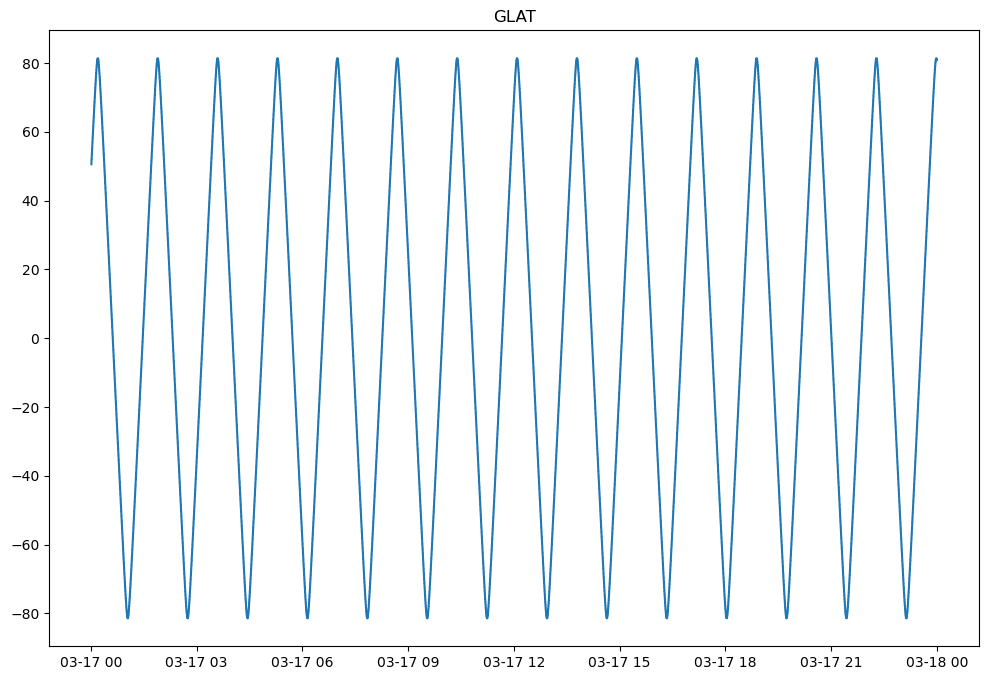

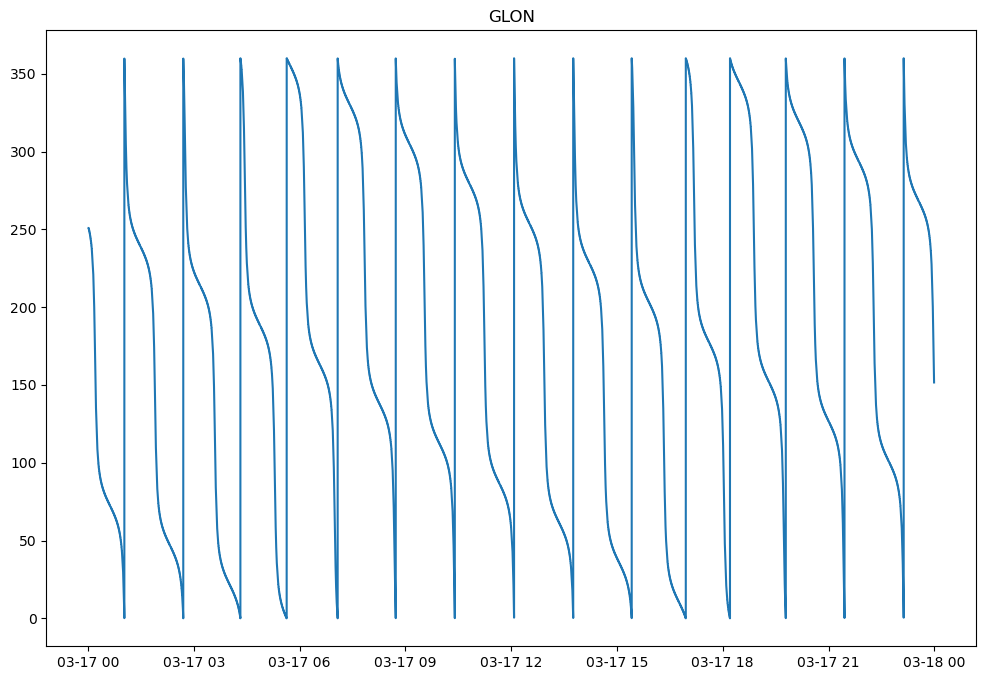

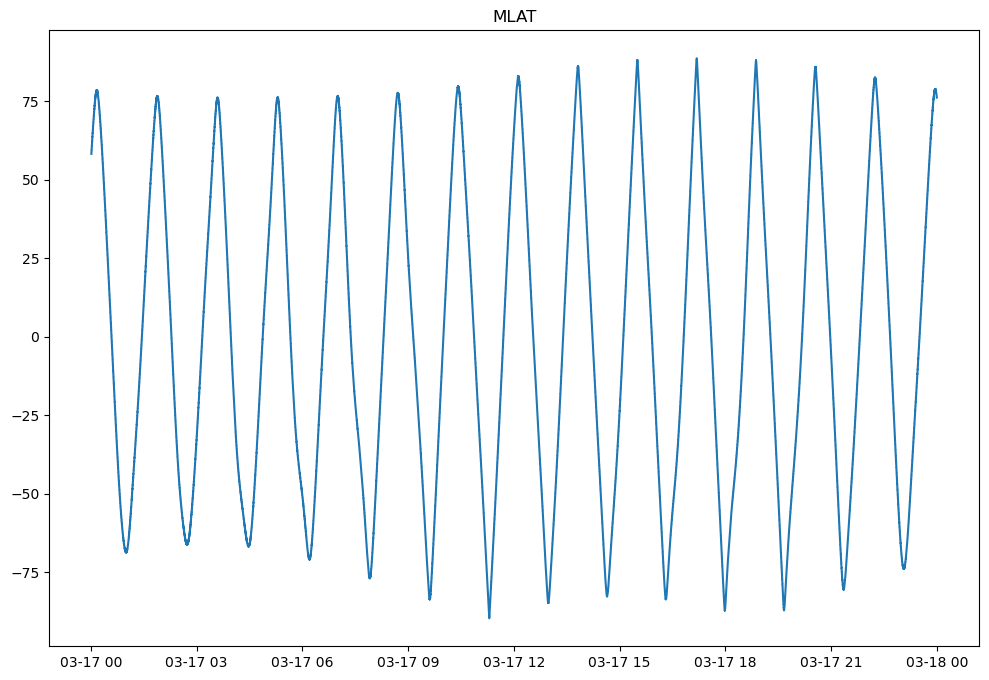

Text(0.5, 1.0, 'MLON')

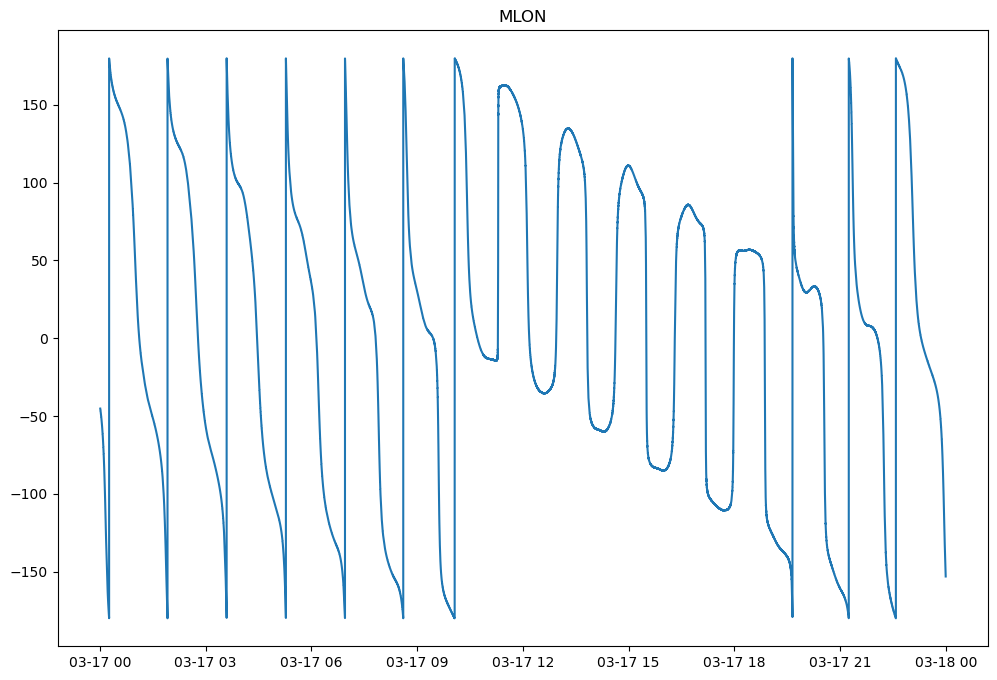

In [10]:
plt.figure(figsize=(12,8))
plt.plot(satlocdf['sat_time'],satlocdf['glat'])
plt.title('GLAT')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(satlocdf['sat_time'],satlocdf['glon'])
plt.title('GLON')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(satlocdf['sat_time'],satlocdf['mlat'])
plt.title('MLAT')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(satlocdf['sat_time'],satlocdf['mlon'])
plt.title('MLON')

100%|███████████████████████████████████| 86100/86100 [00:54<00:00, 1587.55it/s]


Indices of Point Nearest to MLAT = +50 
 
 [1168, 7268, 13368, 19469, 25594, 31760, 37970, 44098, 50131, 56149, 62177, 68232, 74323, 80441] 

Indices of Point Nearest to MLAT = -50 
 
 [2989, 9176, 10232, 15392, 21624, 27780, 28863, 33874, 39927, 45949, 51952, 57955, 63971, 70011, 76087, 82196] 

Length of above variables 14 and 16


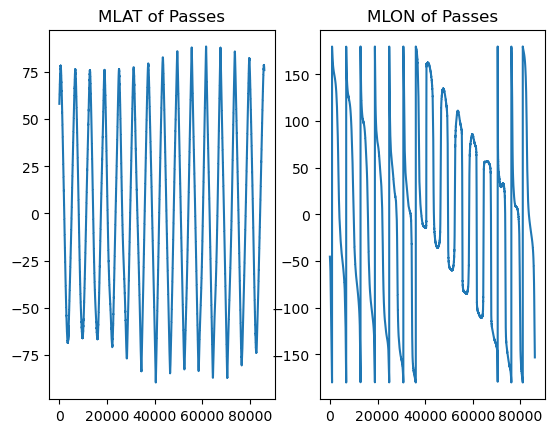

In [11]:
#print(type(satlocdf))
#print(satlocdf.keys())

start_mlat = [] # Start of descending pass at 55 MLAT
end_mlat = []   # Ending of descending pass at -55 MLAT

for i in tqdm(range(len(satlocdf['mlat'])-1)):
    present = satlocdf['mlat'][i]
    next = satlocdf['mlat'][i+1]
    
    if (present >= 55 and next < 55):
        start_mlat.append(i)
    #elif (present <= 55 and next > 55):
    #    start_mlat.append(i)

    elif (present >= -55 and next < -55):
        end_mlat.append(i)
    #elif (present <= -55 and next > -55):
    #    end_mlat.append(i)
        
print('Indices of Point Nearest to MLAT = +50 \n \n', start_mlat, '\n')
print('Indices of Point Nearest to MLAT = -50 \n \n', end_mlat, '\n')

print('Length of above variables', len(start_mlat), 'and', len(end_mlat))

fig, axs = plt.subplots(1,2)

axs[0].plot(satlocdf['sat_step'], satlocdf['mlat'])
axs[0].set_title('MLAT of Passes')

axs[1].plot(satlocdf['sat_step'], satlocdf['mlon'])
axs[1].set_title('MLON of Passes')


In [22]:
index_num = 0

for i in start_mlat:
    for j in end_mlat:
        if j>i:
            print(index_num, i, j, '(', satlocdf['sat_time'][i].dt.time.values, '-', satlocdf['sat_time'][j].dt.time.values, ')')
            index_num += 1
            break

0 1168 2989 ( 00:20:13 - 00:50:42 )
1 7268 9176 ( 02:02:14 - 02:34:10 )
2 13368 15392 ( 03:44:10 - 04:18:02 )
3 19469 21624 ( 05:26:09 - 06:02:14 )
4 25594 27780 ( 07:08:32 - 07:45:06 )
5 31760 33874 ( 08:51:34 - 09:26:56 )
6 37970 39927 ( 10:35:20 - 11:08:05 )
7 44098 45949 ( 12:17:44 - 12:48:45 )
8 50131 51952 ( 13:58:35 - 14:29:04 )
9 56149 57955 ( 15:39:09 - 16:09:23 )
10 62177 63971 ( 17:19:53 - 17:49:55 )
11 68232 70011 ( 19:01:04 - 19:30:51 )
12 74323 76087 ( 20:42:51 - 21:12:23 )
13 80441 82196 ( 22:25:05 - 22:54:28 )


68232 70011
Date & time of start of First Pass on 17th - 2013-03-17T19:01:04.000000000 



100%|██████████████████████████████████████| 1780/1780 [00:03<00:00, 467.97it/s]


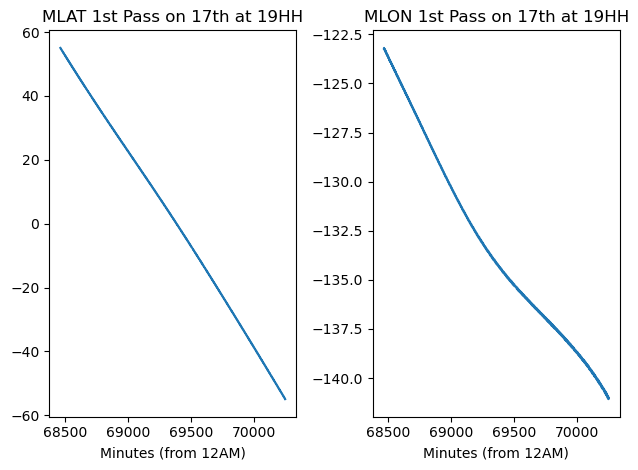

In [46]:
index_n = 11
index_s = 0 # Change to 0 if you want just a single satellite pass
ind_n_mlat = start_mlat[index_n]
ind_s_mlat = 0

if index_s == 0:
    for i in end_mlat:
        ind_s_mlat = i
        if i >= ind_n_mlat:
            break
else:
    ind_s_mlat = end_mlat[index_s]

'''
ind_n_mlat = 0
ind_s_mlat = len(satlocdf['glat'])-1
'''

print(ind_n_mlat, ind_s_mlat)
ind_fin = range(ind_n_mlat,ind_s_mlat+1)
starting_hour = satlocdf['sat_time'][ind_n_mlat].dt.hour.values

print('Date & time of start of First Pass on 17th -', satlocdf['sat_time'][ind_n_mlat].values, '\n')

time_pass = []
for i in tqdm(ind_fin):
    time_pass.append(satlocdf['sat_time'][i].dt.second.values + satlocdf['sat_time'][i].dt.minute.values*60 + 3600*satlocdf['sat_time'][i].dt.hour.values)
#print(time_pass)

fig, axs = plt.subplots(nrows = 1, ncols = 2, sharex = True)

axs[0].plot(time_pass, satlocdf['mlat'][ind_fin])
axs[0].set_title('MLAT 1st Pass on ' + str(satlocdf['sat_time'][ind_s_mlat].dt.day.values) + 'th at ' + str(starting_hour)+ 'HH')
axs[0].set(xlabel='Minutes (from 12AM)')

axs[1].plot(time_pass, satlocdf['mlon'][ind_fin])
axs[1].set_title('MLON 1st Pass on ' + str(satlocdf['sat_time'][ind_s_mlat].dt.day.values) + 'th at ' + str(starting_hour)+ 'HH')
axs[1].set(xlabel='Minutes (from 12AM)')
plt.tight_layout()



In [49]:
time_interpolations = il.reload(time_interpolations)
single_pass_sat1 = time_interpolations.edens_sattime(satlocdf, ind_n_mlat, ind_s_mlat)
print(single_pass_sat1)



 97%|██████████████████████████████████████▋ | 575/595 [00:01<00:00, 431.25it/s]


<xarray.Dataset>
Dimensions:    (sat_step: 86101, sami_time: 288)
Coordinates:
    glat       (sat_step) float64 50.6 50.7 50.7 50.8 ... 80.9 80.9 80.9 80.9
    glon       (sat_step) float64 250.9 250.9 250.8 250.8 ... 152.3 151.9 151.6
    alt        (sat_step) float64 ...
    sat_time   (sat_step) datetime64[ns] 2013-03-17T00:00:45 ... 2013-03-17T2...
  * sami_time  (sami_time) datetime64[ns] 2013-03-17 ... 2013-03-17T23:55:00
Dimensions without coordinates: sat_step
Data variables:
    mlat       (sat_step) float64 58.21 58.31 58.3 58.39 ... 76.17 76.16 76.15
    mlon       (sat_step) float64 -45.2 -45.22 -45.35 ... -152.7 -153.0 -153.1
    edens      (sami_time, sat_step) float64 ...


100%|███████████████████████████████████| 86101/86101 [3:44:33<00:00,  6.39it/s]


<xarray.Dataset>
Dimensions:       (sat_step: 86101, sami_time: 288)
Coordinates:
    glat          (sat_step) float64 50.6 50.7 50.7 50.8 ... 80.9 80.9 80.9 80.9
    glon          (sat_step) float64 250.9 250.9 250.8 ... 152.3 151.9 151.6
    alt           (sat_step) float64 ...
    sat_time      (sat_step) datetime64[ns] 2013-03-17T00:00:45 ... 2013-03-1...
  * sami_time     (sami_time) datetime64[ns] 2013-03-17 ... 2013-03-17T23:55:00
Dimensions without coordinates: sat_step
Data variables:
    mlat          (sat_step) float64 58.21 58.31 58.3 ... 76.17 76.16 76.15
    mlon          (sat_step) float64 -45.2 -45.22 -45.35 ... -153.0 -153.1
    edens         (sami_time, sat_step) float64 ...
    interp_edens  (sat_step) float64 4.788e+04 4.79e+04 ... 2.386e+04 2.378e+04


In [50]:
single_pass_sat1.to_netcdf("/time_interpolated_data/complete_sat_data.nc")


In [29]:
single_pass_sat =  xr.open_dataset('/time_interpolated_data/single_pass_sat.nc')
single_pass_sat

<xarray.Dataset>
Dimensions:       (sat_step: 1822, sami_time: 7)
Coordinates:
    glat          (sat_step) float64 dask.array<chunksize=(1822,), meta=np.ndarray>
    glon          (sat_step) float64 dask.array<chunksize=(1822,), meta=np.ndarray>
    alt           (sat_step) float64 dask.array<chunksize=(1822,), meta=np.ndarray>
    sat_time      (sat_step) datetime64[ns] dask.array<chunksize=(1822,), meta=np.ndarray>
  * sami_time     (sami_time) datetime64[ns] 2013-03-17T00:20:00 ... 2013-03-...
Dimensions without coordinates: sat_step
Data variables:
    mlat          (sat_step) float64 dask.array<chunksize=(1822,), meta=np.ndarray>
    mlon          (sat_step) float64 dask.array<chunksize=(1822,), meta=np.ndarray>
    interp_edens  (sat_step) float64 dask.array<chunksize=(1822,), meta=np.ndarray>
    edens         (sami_time, sat_step) float64 dask.array<chunksize=(7, 1822), meta=np.ndarray>

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 103.65it/s]


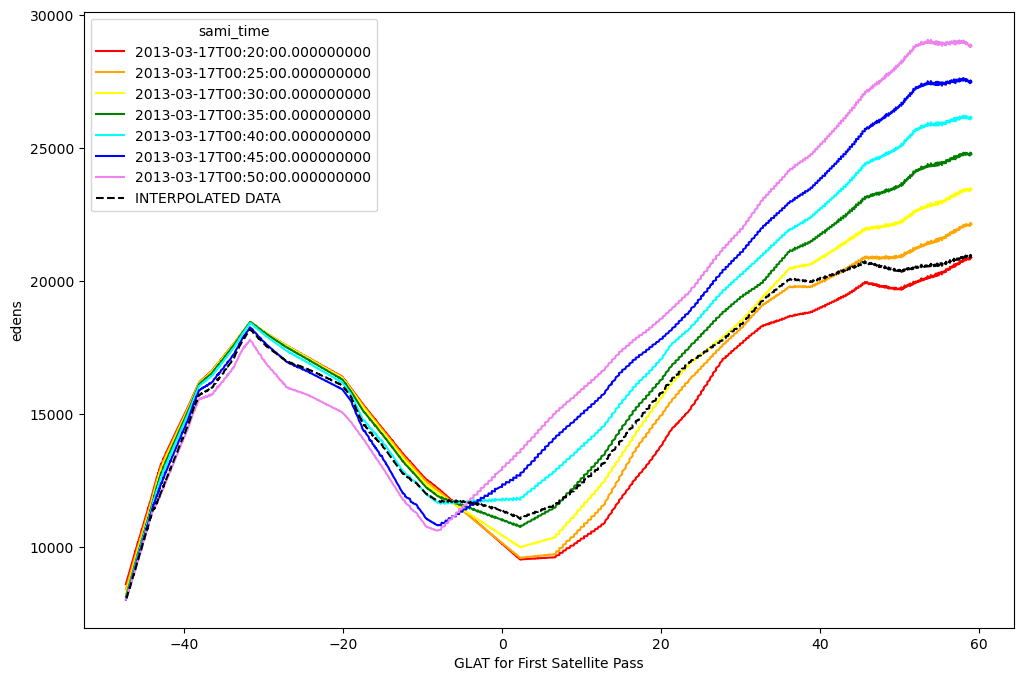

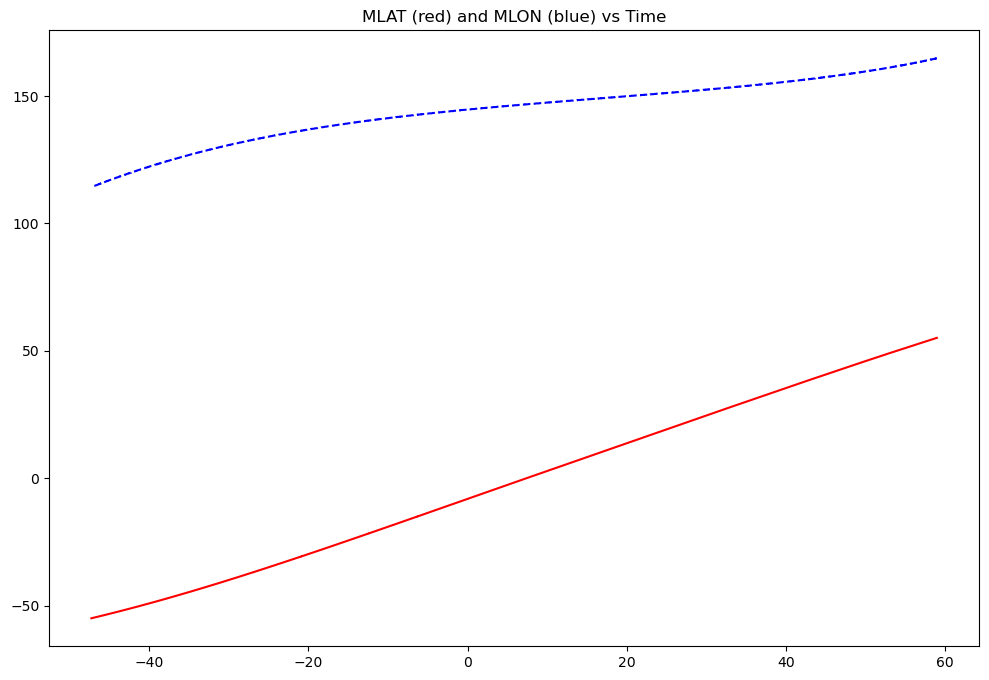

<xarray.Dataset>
Dimensions:       (sat_step: 1822, sami_time: 7)
Coordinates:
    glat          (sat_step) float64 dask.array<chunksize=(1822,), meta=np.ndarray>
    glon          (sat_step) float64 dask.array<chunksize=(1822,), meta=np.ndarray>
    alt           (sat_step) float64 dask.array<chunksize=(1822,), meta=np.ndarray>
    sat_time      (sat_step) datetime64[ns] dask.array<chunksize=(1822,), meta=np.ndarray>
  * sami_time     (sami_time) datetime64[ns] 2013-03-17T00:20:00 ... 2013-03-...
Dimensions without coordinates: sat_step
Data variables:
    mlat          (sat_step) float64 dask.array<chunksize=(1822,), meta=np.ndarray>
    mlon          (sat_step) float64 dask.array<chunksize=(1822,), meta=np.ndarray>
    interp_edens  (sat_step) float64 dask.array<chunksize=(1822,), meta=np.ndarray>
    edens         (sami_time, sat_step) float64 dask.array<chunksize=(7, 1822), meta=np.ndarray>


In [30]:
plt.figure(figsize=(12,8))

'''
time_axis = []

for i in tqdm(single_pass_sat['sat_time']):
    time_axis.append(60*(i.dt.hour.values) + i.dt.minute.values)
'''

colors=['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'violet']

for i_sami_time in tqdm(range(7)):
    plt.plot(single_pass_sat['glat'], 
                single_pass_sat.edens.isel(sami_time=i_sami_time), 
                label=single_pass_sat.sami_time.values[i_sami_time],
            c=colors[i_sami_time])

plt.plot(single_pass_sat['glat'], single_pass_sat.interp_edens, label='INTERPOLATED DATA', linestyle='--', c='k')
plt.xlabel('GLAT for First Satellite Pass')
plt.ylabel('edens')
plt.legend(title='sami_time')
plt.show()


plt.figure(figsize=(12,8))
plt.plot(single_pass_sat['glat'], single_pass_sat.mlat, label = 'mlat', c = 'red')
plt.plot(single_pass_sat['glat'], single_pass_sat.mlon, label = 'mlon', c = 'blue',linestyle='--')
plt.title('MLAT (red) and MLON (blue) vs Time')
plt.show()

print(single_pass_sat)


### Background Removal

[96, 196, 297, 398, 497, 584]


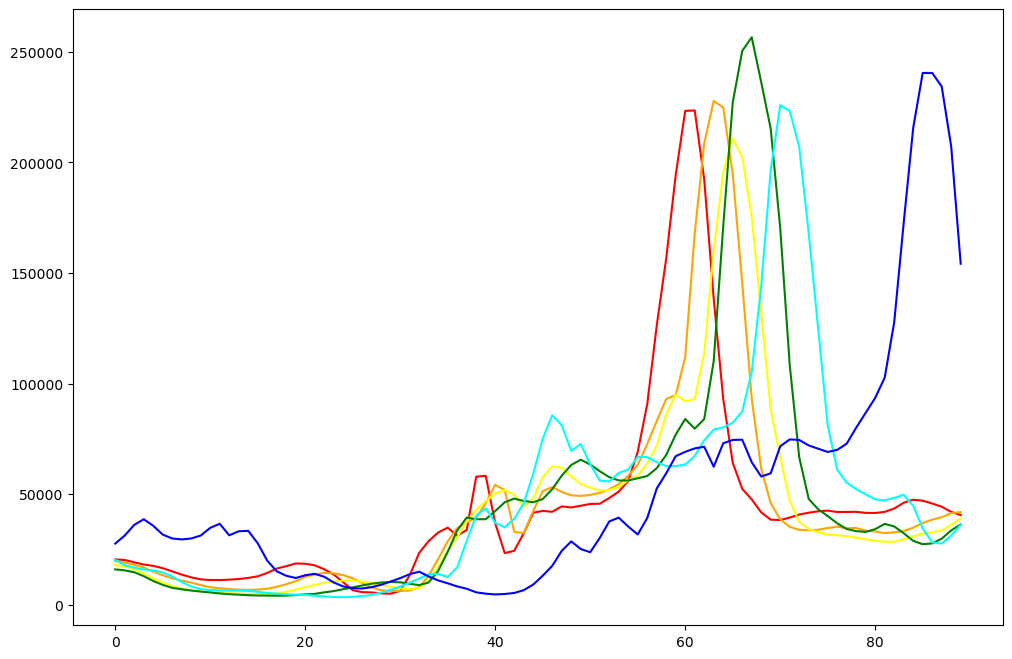

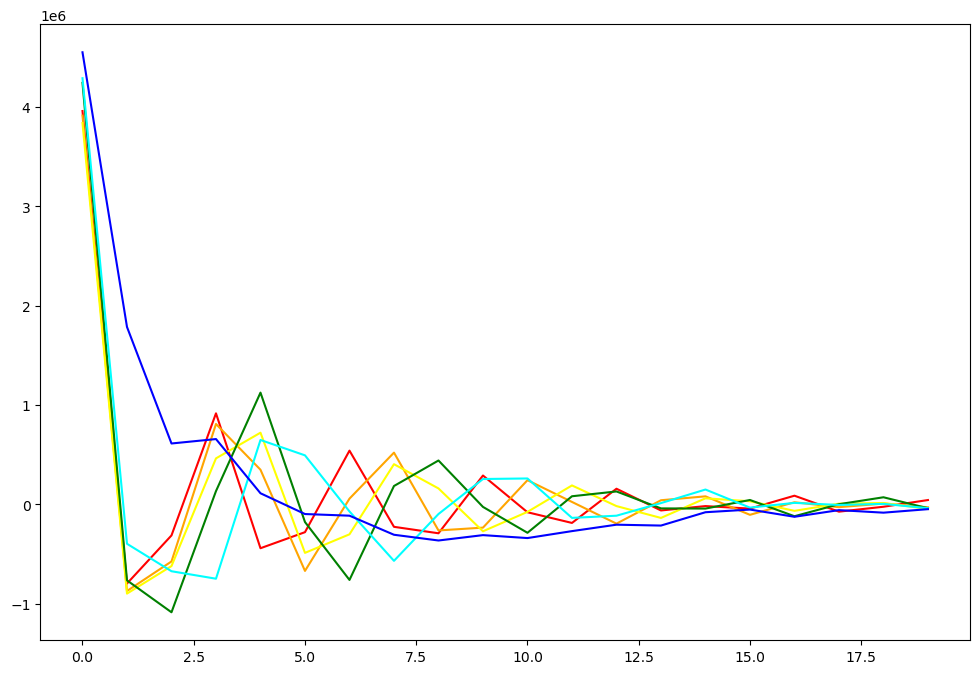

In [54]:
import scipy.fftpack as fft

n = len(single_pass_sat['sat_step'])
fft_edens = fft.fft(single_pass_sat['edens_sami_int'].values)

sign_change = []
for i in range(n-1):
    if single_pass_sat['mlon'][i] < 0 and single_pass_sat['mlon'][i+1] > 0:
        sign_change.append(i+1)

print(sign_change)

colors=['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'violet']
plt.figure(figsize=(12,8))

start = 0
for i in range(6):
    end = sign_change[i]
    plt.plot(single_pass_sat['edens_sami_int'][end-90:end], label=(str(i) + ' Pass'), c=colors[i])


plt.figure(figsize=(12,8))
start = 0
for i in range(6):
    end = sign_change[i]
    plt.plot(fft.fft(single_pass_sat['edens_sami_int'][end-90:end].values)[:20], label=(str(i) + ' Pass'), c=colors[i])


In [21]:
# Obtaining the data from the SAMI regrid file

#sami_data = xr.open_mfdataset('/petastore/phil/DMSP_INTERPOLATIONS/interpolated/20130317/GLOBAL_SAMI_REGRID.nc').load()

#sami_data

In [14]:
### IMPLEMENTED IN edens_sattime FUNCTION

sami_start = 0
sami_end = 0
single_pass_sat = satlocdf.isel(sat_time=slice(ind_n_mlat,ind_s_mlat+1))


for i in range(len(single_pass_sat['sami_time'])-1):

    date_sami = single_pass_sat['sami_time'][i]
    
    if date_sami.dt.day.values == 17:
        if date_sami.dt.hour.values == starting_hour:
            minute_sami = date_sami.dt.minute.values
            
            if minute_sami <= time_pass[0] and (minute_sami+5) > time_pass[0]:
                sami_start = i
        if sami_start != 0:
            
            if minute_sami <= time_pass[-1] and (minute_sami+5) > time_pass[-1]:
                sami_end = i
                break

print('Sami starting and ending indices-', sami_start, sami_end, '\n')
passing_ds = single_pass_sat.isel(sami_time=slice(sami_start,sami_end+1))
passing_ds

Sami starting and ending indices- 292 298 



<xarray.Dataset>
Dimensions:    (sami_time: 7, sat_time: 31)
Coordinates:
  * sami_time  (sami_time) datetime64[ns] 2013-03-17T00:19:55.200000 ... 2013...
    glat       (sat_time) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    glon       (sat_time) float64 dask.array<chunksize=(31,), meta=np.ndarray>
  * sat_time   (sat_time) datetime64[ns] 2013-03-17T00:20:00 ... 2013-03-17T0...
Data variables:
    e_dens     (sami_time, sat_time) float64 dask.array<chunksize=(7, 31), meta=np.ndarray>
    mlat       (sat_time) float64 55.89 52.49 49.04 ... -47.36 -50.37 -53.2
    mlon       (sat_time) float64 165.3 163.1 161.2 159.5 ... 124.3 120.9 117.0

In [38]:
### IMPLEMENTED IN edens_sattime FUNCTION

sami_pass = passing_ds['sami_time']
sami_pass_min = []
for i in sami_pass:
    sami_pass_min.append(i.dt.minute.values + 60*i.dt.hour.values + i.dt.second.values/60)


sat_pass = passing_ds['sat_time']
sat_pass_min = []
for i in sat_pass:
    sat_pass_min.append(i.dt.minute.values + 60*i.dt.hour.values + i.dt.second.values/60)

interpolated_edens = []

for i in tqdm(passing_ds['sat_time']):
    sami_iter = []

    for j in passing_ds['sami_time']:
        
        sami_iter.append(passing_ds.e_dens.sel(sami_time = j, sat_time = i, method='nearest').values)
    
    cs = CubicSpline(sami_pass_min, sami_iter)

    '''
    time_sat_pass = []
    for k in passing_ds['sat_time']:
        time_sat_pass.append((k.dt.minute.values) + 60*(k.dt.hour.values) + (k.dt.second.values)/60)
    ''' 
    interpolated_edens.append(cs((i.dt.minute.values) + 60*(i.dt.hour.values) + (i.dt.second.values)%60))

print('Size of non-zero edens added-', np.size(interpolated_edens))
single_pass_sat['edens_sami_int'] = ('sat_time', interpolated_edens) 
print(single_pass_sat)

100%|███████████████████████████████████████████| 31/31 [00:04<00:00,  6.61it/s]

Size of non-zero edens added- 31
<xarray.Dataset>
Dimensions:         (sami_time: 597, sat_time: 31)
Coordinates:
  * sami_time       (sami_time) datetime64[ns] 2013-03-16 ... 2013-03-18T01:3...
    glat            (sat_time) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    glon            (sat_time) float64 dask.array<chunksize=(31,), meta=np.ndarray>
  * sat_time        (sat_time) datetime64[ns] 2013-03-17T00:20:00 ... 2013-03...
Data variables:
    e_dens          (sami_time, sat_time) float64 dask.array<chunksize=(597, 31), meta=np.ndarray>
    mlat            (sat_time) float64 55.89 52.49 49.04 ... -47.36 -50.37 -53.2
    mlon            (sat_time) float64 165.3 163.1 161.2 ... 124.3 120.9 117.0
    edens_sami_int  (sat_time) float64 2.191e+04 2.164e+04 ... 1.022e+04


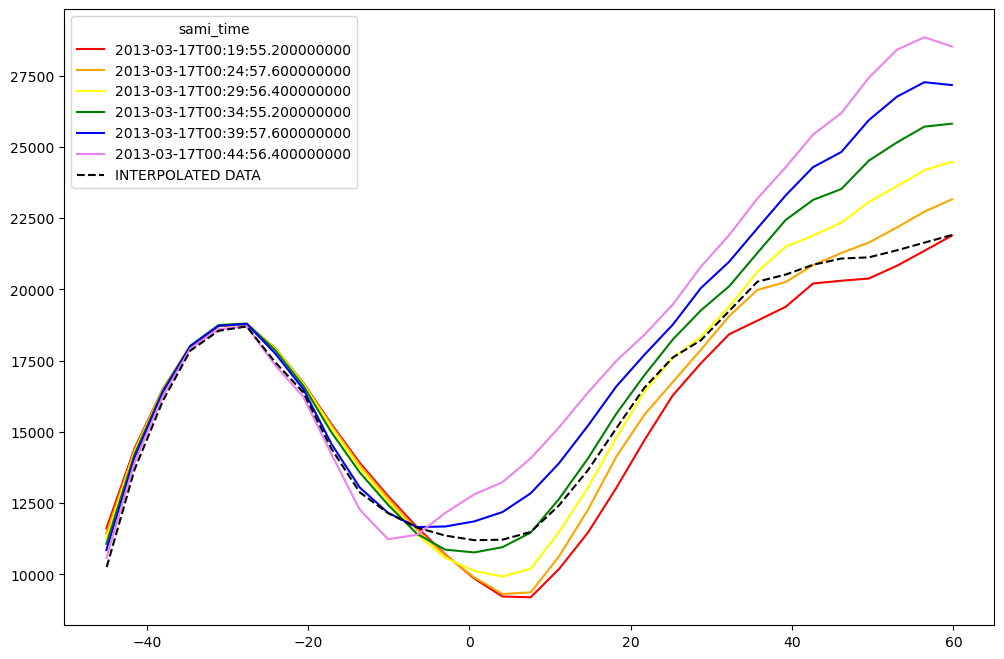

<xarray.Dataset>
Dimensions:         (sami_time: 597, sat_time: 31)
Coordinates:
  * sami_time       (sami_time) datetime64[ns] 2013-03-16 ... 2013-03-18T01:3...
    glat            (sat_time) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    glon            (sat_time) float64 dask.array<chunksize=(31,), meta=np.ndarray>
  * sat_time        (sat_time) datetime64[ns] 2013-03-17T00:20:00 ... 2013-03...
Data variables:
    e_dens          (sami_time, sat_time) float64 dask.array<chunksize=(597, 31), meta=np.ndarray>
    mlat            (sat_time) float64 55.89 52.49 49.04 ... -47.36 -50.37 -53.2
    mlon            (sat_time) float64 165.3 163.1 161.2 ... 124.3 120.9 117.0
    edens_sami_int  (sat_time) float64 2.191e+04 2.164e+04 ... 1.022e+04

In [45]:
### IMPLEMENTED ABOVE

plt.figure(figsize=(12,8))

colors=['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'violet']


for i_sami_time in range(sami_start, sami_end+1):
    plt.plot(single_pass_sat.glat, 
                single_pass_sat.e_dens.isel(sami_time=i_sami_time), 
                label=single_pass_sat.sami_time.values[i_sami_time],
            c=colors[i_sami_time-sami_start])
    
plt.plot(single_pass_sat.glat, single_pass_sat.edens_sami_int, label='INTERPOLATED DATA', linestyle='--', c='k')
    
plt.legend(title='sami_time')
plt.show()

single_pass_sat

First image is the edens of sami_data only during satellite pass at alt = 850 and mlon = mlon_avg 

Second image is the altitude-integrated edens of sami_data only during satellite pass with mlon = mlon_avg 

Third image is the edens of whole sami_data at alt = 850 and mlon = mlon_avg 

Fourth image is the edens of whole sami_data at alt = 850 and mlon = mlon_avg 



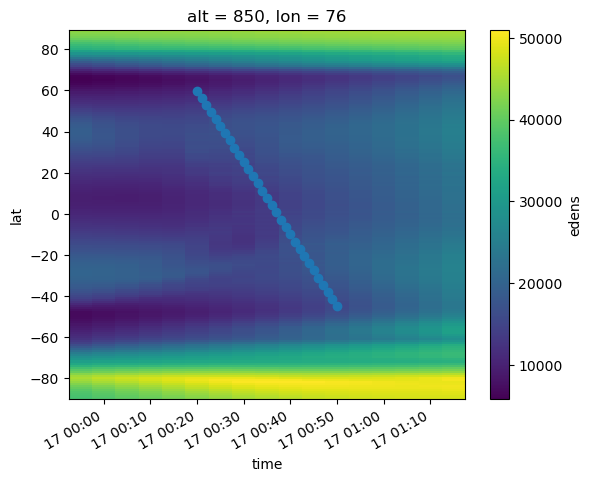

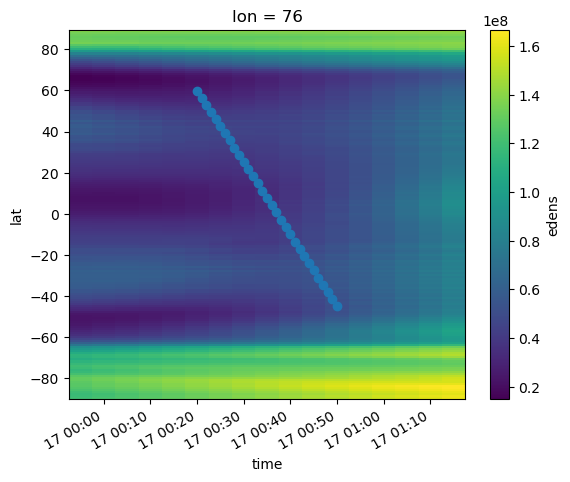

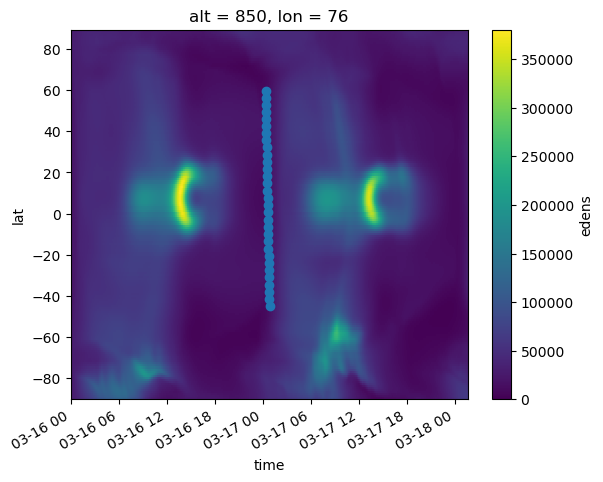

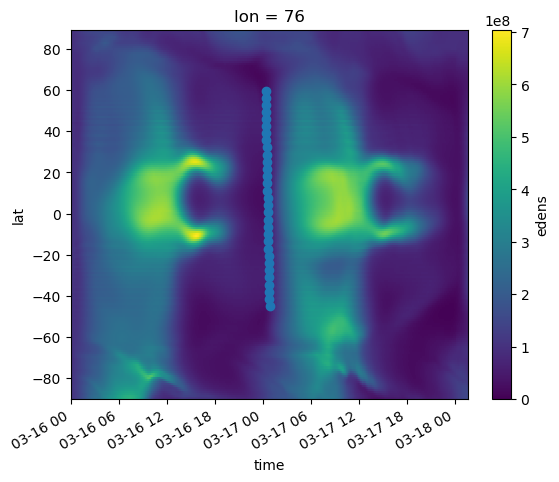

In [11]:
glon_avg = single_pass_sat.glon.mean()

print('First image is the edens of sami_data only during satellite pass at alt = 850 and mlon = mlon_avg \n')
passing_sami2.edens.sel(alt = alt, lon=glon_avg, method='nearest').plot(x='time')
plt.scatter(single_pass_sat.sat_time, single_pass_sat.glat)

print('Second image is the altitude-integrated edens of sami_data only during satellite pass with mlon = mlon_avg \n')
plt.figure()
passing_sami2.edens.sel(lon=glon_avg, method='nearest').integrate('alt').plot(x='time')
plt.scatter(single_pass_sat.sat_time, single_pass_sat.glat)

print('Third image is the edens of whole sami_data at alt = 850 and mlon = mlon_avg \n')
plt.figure()
sami_data.edens.sel(alt = alt, lon=glon_avg, method='nearest').plot(x='time')
plt.scatter(single_pass_sat.sat_time, single_pass_sat.glat)


print('Fourth image is the edens of whole sami_data at alt = 850 and mlon = mlon_avg \n')
plt.figure()
sami_data.edens.sel(lon=glon_avg, method='nearest').integrate('alt').plot(x='time')
plt.scatter(single_pass_sat.sat_time, single_pass_sat.glat)

In [12]:
from scipy.signal import butter, sosfiltfilt, sosfilt_zi, sosfilt, lfilter, filtfilt


def filt_filt(da,
              freq=5,
              lims=[40, 85],
              order=1,
              percent=True):

    # Define sampling frequency and limits in minutes
    sampling_freq = freq
    lower_limit = min(lims)
    upper_limit = max(lims)

    # Convert limits to corresponding indices
    lower_index = int(lower_limit / sampling_freq)
    upper_index = int(upper_limit / sampling_freq)

    # Design the bandpass filter
    nyquist_freq = 0.5 * sampling_freq
    lower_cutoff = lower_index / nyquist_freq
    upper_cutoff = upper_index / nyquist_freq
    b, a = butter(order, [1/upper_cutoff, 1/lower_cutoff],
                  btype='band', analog=False)

    # Apply the filter to the data
    filtd = filtfilt(b, a, da, axis=0)
    # filtd = xr.apply_ufunc(filtfilt, b, a, da, dask='allowed')

    if percent:
        return (100*(filtd)/da)

    else:
        da.values = filtd
        return da

/home/pxv220016/.conda/envs/jlab/lib/python3.11/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in divide
  result_data = func(*input_data)
/home/pxv220016/.conda/envs/jlab/lib/python3.11/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in divide
  result_data = func(*input_data)


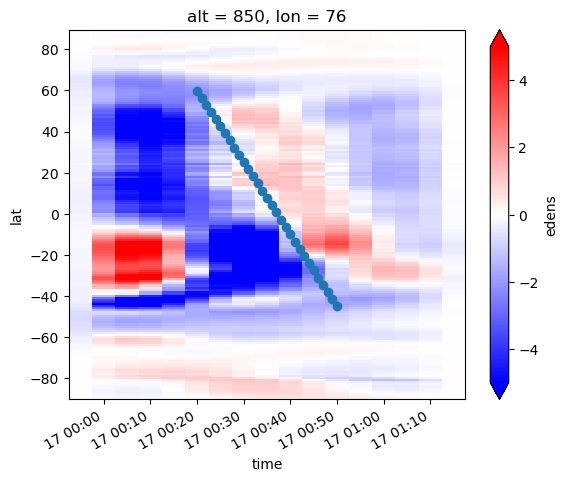

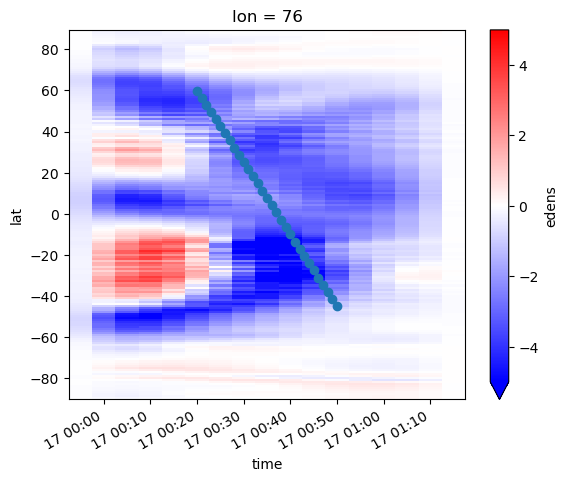

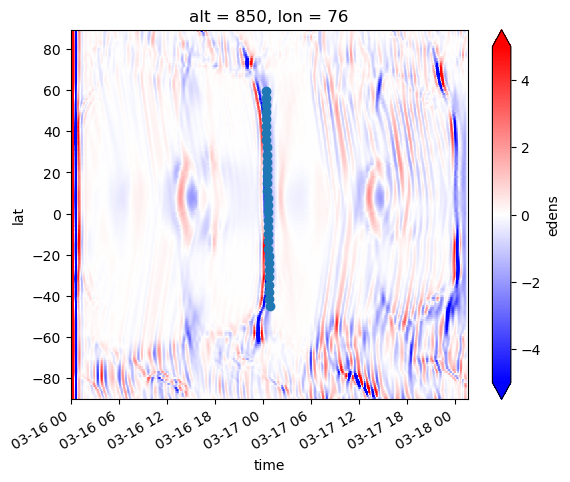

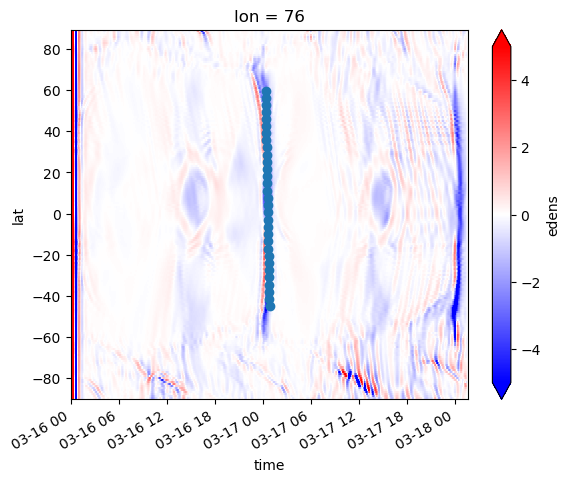

In [13]:

plt.figure()
filt_filt(passing_sami.edens.sel(alt = alt, lon=glon_avg, method='nearest')).plot(x='time', vmin=-5, vmax=5, cmap='bwr')
plt.scatter(single_pass_sat.sat_time, single_pass_sat.glat)

plt.figure()
filt_filt(passing_sami.edens.sel(lon=glon_avg, method='nearest').integrate('alt')).plot(x='time', vmin=-5, vmax=5, cmap='bwr')
plt.scatter(single_pass_sat.sat_time, single_pass_sat.glat)


plt.figure()
filt_filt(sami_data.edens.sel(alt = alt, lon=glon_avg, method='nearest')).plot(x='time', vmin=-5, vmax=5, cmap='bwr')
plt.scatter(single_pass_sat.sat_time, single_pass_sat.glat)

plt.figure()
filt_filt(sami_data.edens.sel(lon=glon_avg, method='nearest').integrate('alt')).plot(x='time', vmin=-5, vmax=5, cmap='bwr')
plt.scatter(single_pass_sat.sat_time, single_pass_sat.glat)

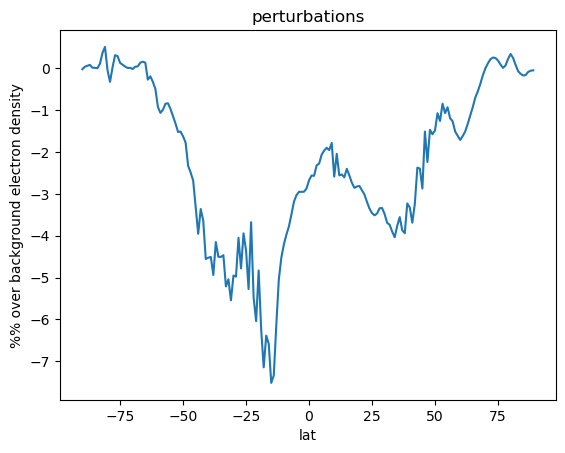

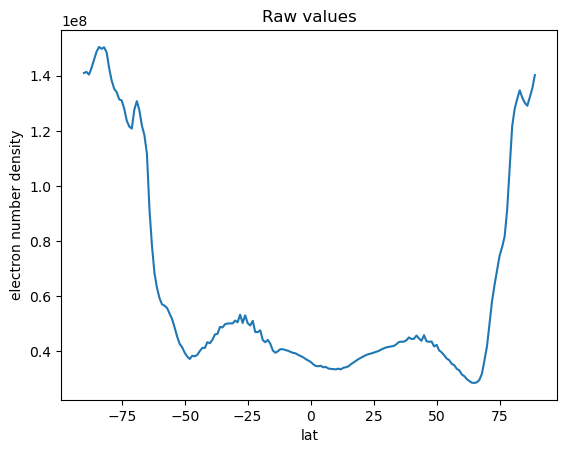

In [14]:
mid = int(len(passing_sami['time'])/2)
#print(mid)
#print(passing_sami['time'])

filt_filt(passing_sami.edens.sel(lon=glon_avg, method='nearest').integrate('alt')).isel(time=mid).plot()
plt.title('perturbations')
plt.ylabel('%% over background electron density')
plt.show()
    

passing_sami.edens.sel(lon=glon_avg, method='nearest').integrate('alt').isel(time=mid).plot()
plt.title('Raw values')
plt.ylabel('electron number density')
plt.show()

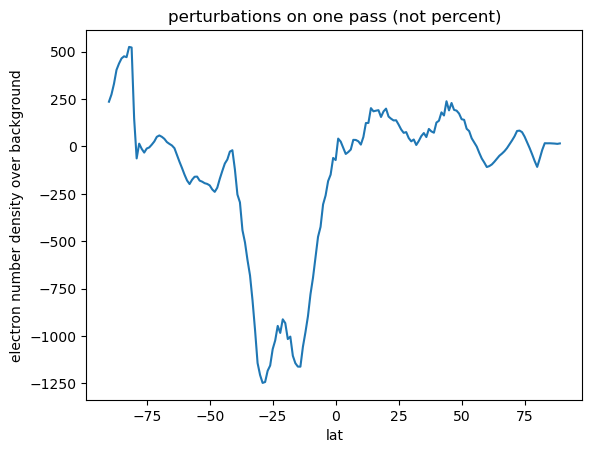

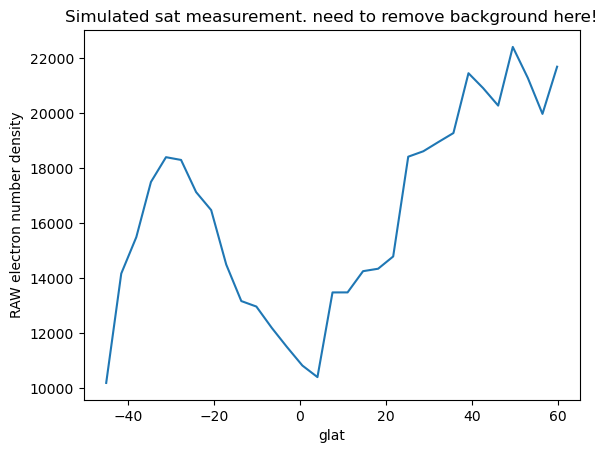

<xarray.Dataset>
Dimensions:         (sami_time: 597, sat_time: 31)
Coordinates:
  * sami_time       (sami_time) datetime64[ns] 2013-03-16 ... 2013-03-18T01:3...
    glat            (sat_time) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    glon            (sat_time) float64 dask.array<chunksize=(31,), meta=np.ndarray>
  * sat_time        (sat_time) datetime64[ns] 2013-03-17T00:20:00 ... 2013-03...
Data variables:
    e_dens          (sami_time, sat_time) float64 dask.array<chunksize=(597, 31), meta=np.ndarray>
    mlat            (sat_time) float64 55.89 52.49 49.04 ... -47.36 -50.37 -53.2
    mlon            (sat_time) float64 165.3 163.1 161.2 ... 124.3 120.9 117.0
    edens_sami_int  (sat_time) float64 2.168e+04 1.996e+04 ... 1.019e+04

In [15]:

filt_filt(passing_sami.edens.sel(lon=glon_avg, method='nearest', alt=850), percent=False).isel(time=mid).plot()
plt.title('perturbations on one pass (not percent)')
plt.ylabel('electron number density over background')
plt.show()


plt.plot(single_pass_sat.glat, single_pass_sat.edens_sami_int)
plt.ylabel('RAW electron number density')
plt.xlabel('glat')
plt.title('Simulated sat measurement. need to remove background here!')
plt.show()

single_pass_sat

In [16]:
# Here's how you can present it. 
# THis is super basic so you will need to change almost all of it. Just use this for reference.

#rolling_bg = single_pass_sat['glat'].values.rolling(6).mean()
rolling_bg = single_pass_sat.rolling(on='glat',window=6,center=True).mean()

plt.plot(single_pass_sat.glat, single_pass_sat.edens, label='raw')
plt.plot(rolling_bg.glat, rolling_bg.edens, label='rolling mean background')
plt.legend()

plt.ylabel('electron number density')
plt.xlabel('glat')
plt.title('template for showing how background matches')
plt.show()


filt_filt(passing_sami.edens.sel(lon=glon_avg, method='nearest', alt=850), percent=False).isel(time=mid).plot(label='real perturbations')
plt.plot(single_pass_sat.glat, single_pass_sat.edens-rolling_bg.edens, label='rolling perturbs')

plt.title('TEMPLATE FOR perturbations on one pass (not percent)')
plt.ylabel('electron number density over background')
plt.show()

TypeError: '<=' not supported between instances of 'str' and 'int'

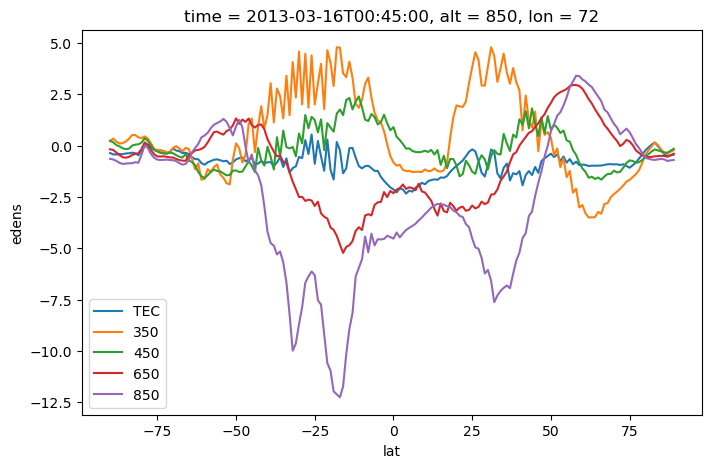

In [91]:
# AN interesting plot I want to make...

alts = [350, 450, 650, 850]

plt.figure(figsize=(8,5))

filt_filt(passing_sami.edens.sel(lon=glon_avg, method='nearest').integrate('alt'), percent=True).isel(time=mid).plot(label='TEC')


for a in alts:
    filt_filt(passing_sami.edens.sel(lon=glon_avg, method='nearest', alt=a), percent=True).isel(time=mid).plot(label=str(a))

plt.legend()
    